# Iris Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
#splitting the dataset into train set and test set
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

### Exploratory Data Analysis 

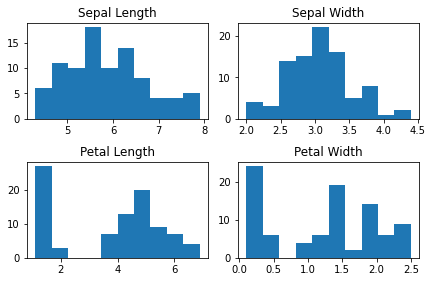

In [7]:
#Let’s first create some univariate plots. Create a histogram for each feature:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

Note that for both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others, suggesting that there might be different groups in this data.

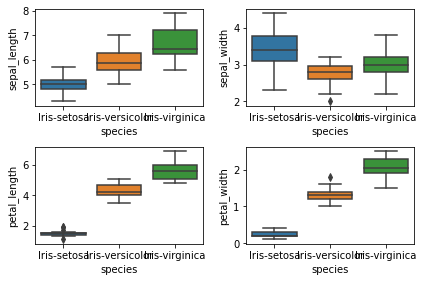

In [10]:
#Next, let’s try some side-by-side box plots:
fig, axs = plt.subplots(2, 2)
fn = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);
plt.show()

The two plots at the bottom suggest that that group of data points we saw earlier are setosas. Their petal measurements are smaller and less spread-out than those of the other two species as well. Comparing the other two species, versicolor has lower values than virginica on average.

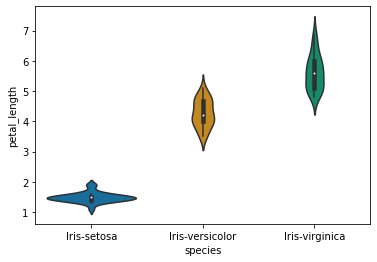

In [11]:
sns.violinplot(x='species', y='petal_length', data=train, size=5, order = cn, palette = 'colorblind')

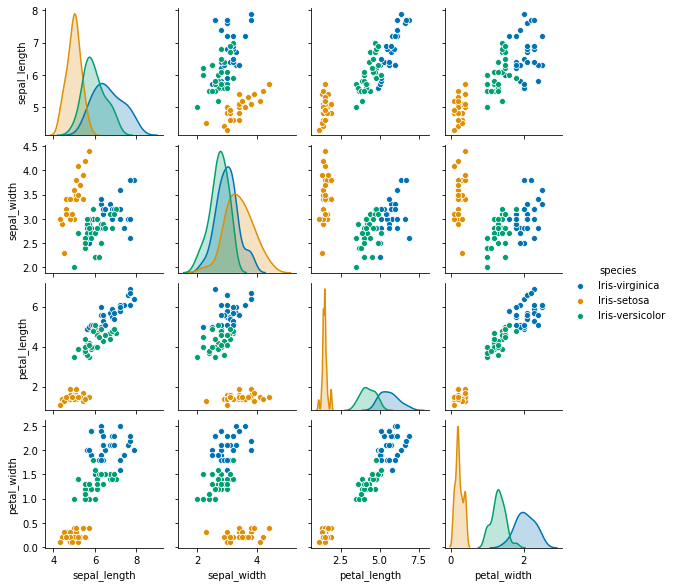

In [12]:
#Now we can make scatterplots of all-paired attributes by using seaborn’s pairplot function:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind')

Note that some variables seem to be highly correlated, e.g. petal_length and petal_width. In addition, the petal measurements separate the different species better than the sepal ones.

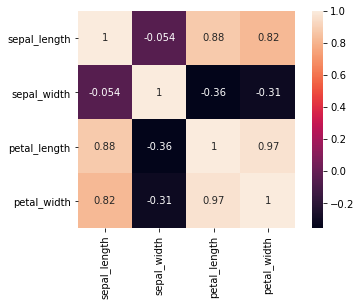

In [13]:
#Next, let’s make a correlation matrix to quantitatively examine the relationship between variables:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True)

The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the petal features also have relatively high correlation with sepal_length, but not with sepal_width.

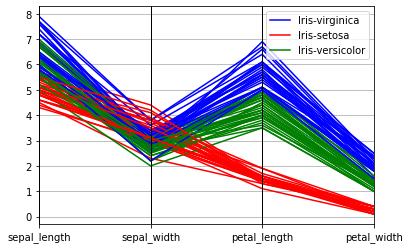

In [14]:
#Another cool visualization tool is parallel coordinate plot, which represents each row as a line.
parallel_coordinates(train, "species", color = ['blue', 'red', 'green'])

As we have seen before, petal measurements can separate species better than the sepal ones.

### Model Building 

In [15]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

#### Classification Tree 

In [17]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


This decision tree predicts 98.3% of the test data correctly. One nice thing about this model is that you can see the importance of each predictor through its feature_importances_ attribute:

In [18]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

From the output and based on the indices of the four features, we know that the first two features (sepal measurements) are of no importance, and only the petal ones are used to build this tree.

Another nice thing about the decision tree is that we can visualize the classification rules through plot_tree:

[Text(209.25, 380.52, 'petal_width <= 0.7\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = Iris-setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = Iris-setosa'),
 Text(279.0, 271.8, 'petal_length <= 4.95\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = Iris-versicolor'),
 Text(139.5, 163.07999999999998, 'petal_width <= 1.65\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]\nclass = Iris-versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = Iris-versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(418.5, 163.07999999999998, 'petal_width <= 1.7\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = Iris-virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = Iris-virg

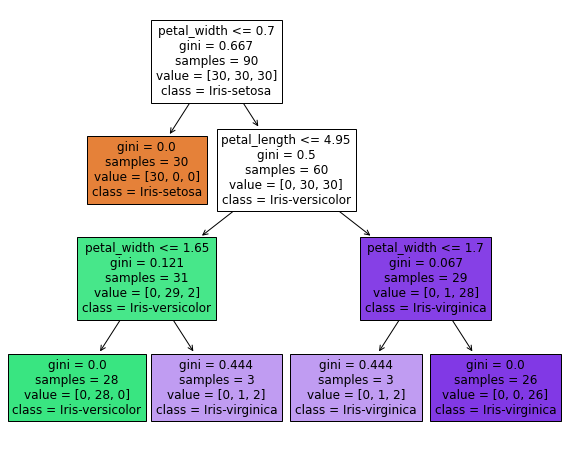

In [19]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True)

(0.0, 6.99, 0.0, 2.99)

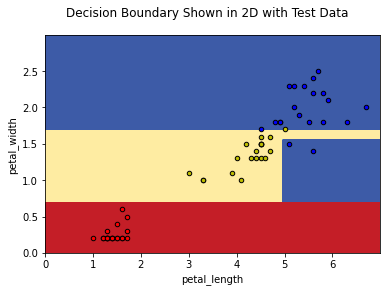

In [22]:
# plot decision boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight")

Text(0.5, 1.0, 'Decision Tree Confusion matrix, without normalization')

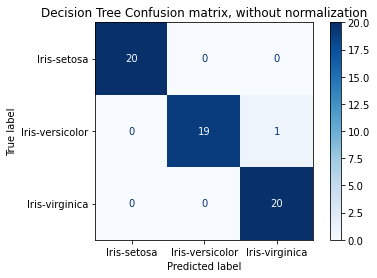

In [20]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization')

#### Guassian Naive Bayes Classifier 

In [23]:
# Guassian Naive Bayes Classifier
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.933


In [24]:
# Guassian Naive Bayes Classifier with two predictors
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is 0.950


#### Linear Discriminant Analysis 

In [25]:
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier on test data is 0.983


In [26]:
# LDA Classifier with two predictors
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the LDA Classifier with two predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))


The accuracy of the LDA Classifier with two predictors on test data is 0.933


Text(0.5, 1.0, 'LDA Decision Boundaries with Test Data')

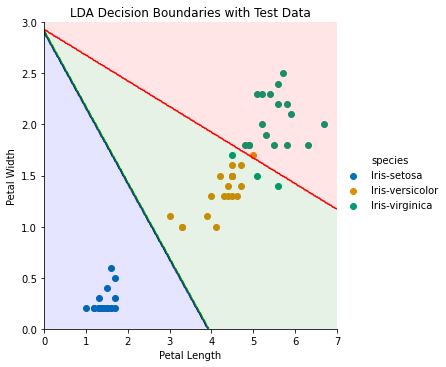

In [27]:
# LDA with 2 predictors
mod_lda_1 = LinearDiscriminantAnalysis()
y_pred = mod_lda_1.fit(X_train[selected_predictors], y_train_en).predict(X_test[selected_predictors])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_lda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Add axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('LDA Decision Boundaries with Test Data')

#### Quadratic Discriminant Analysis (QDA) 

In [28]:
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the QDA Classifier is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier is 0.983


In [29]:
# QDA Classifier with two predictors
mod_qda = QuadraticDiscriminantAnalysis()
y_pred = mod_qda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the QDA Classifier with two predictors is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier with two predictors is 0.967


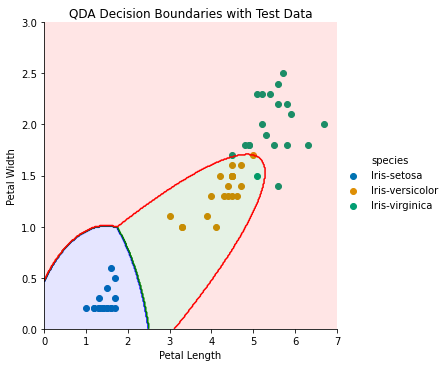

In [30]:
# QDA with 2 predictors
mod_qda_1 = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_1.fit(X_train.iloc[:,2:4], y_train_en).predict(X_test.iloc[:,2:4])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_qda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('QDA Decision Boundaries with Test Data');

#### K Nearest Neighbors (K-NN) 

In [31]:
# KNN, first try 5
mod_5nn=KNeighborsClassifier(n_neighbors=5) 
mod_5nn.fit(X_train,y_train)
prediction=mod_5nn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the 5NN Classifier is 0.933


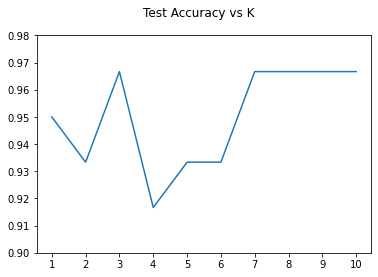

In [32]:
# try different k
acc_s = pd.Series(dtype = 'float')
for i in list(range(1,11)):
    mod_knn=KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train,y_train)
    prediction=mod_knn.predict(X_test)
    acc_s = acc_s.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
    
plt.plot(list(range(1,11)), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);

In [33]:
# SVC with linear kernel
# for SVC, may be impractical beyond tens of thousands of samples
linear_svc = SVC(kernel='linear').fit(X_train, y_train)
prediction=linear_svc.predict(X_test)
print('The accuracy of the linear SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the linear SVC is 1.000


In [34]:
# SVC with polynomial kernel
poly_svc = SVC(kernel='poly', degree = 4).fit(X_train, y_train)
prediction=poly_svc.predict(X_test)
print('The accuracy of the Poly SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Poly SVC is 0.933


In [35]:
# Logistic regression
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
prediction=mod_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))


The accuracy of the Logistic Regression is 0.950


Explored the Iris dataset, and then built a few popular classifiers using sklearn. We saw that the petal measurements are more helpful at classifying instances than the sepal ones. Furthermore, most models achieved a test accuracy of over 95%.